In [1]:
from Bio import SeqIO
from Bio.Alphabet import IUPAC
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re

In [2]:
ppi_file = r'.\data\HIPPIE_v2.1.tsv'
fasta_file = r'.\data\HUMAN_uniport.fasta'

In [3]:
records = list(SeqIO.parse(fasta_file, "fasta"))
names = []
sequences = []
for seq in records:
    names.append(str(seq.name))
    sequences.append(str(seq.seq))
protein_dict = dict(zip(names,sequences))

In [29]:
with open(ppi_file, 'r') as ppi:
    pro_1 = []
    pro_2 = []
    scores = []
    pro_1_seq = []
    pro_2_seq = []
    for line in ppi.readlines():
        line_list = line.strip().split("\t") 
        if re.search(r'_HUMAN', line_list[0]) and re.search(r'_HUMAN', line_list[2]) and float(line_list[4]) >= 0.72 and line_list[0] in protein_dict and line_list[2] in protein_dict:
            if len(protein_dict[line_list[0]]) <= 512 and len(protein_dict[line_list[2]]) <= 512:
                pro_1.append(line_list[0])
                pro_2.append(line_list[2])
                pro_1_seq.append(protein_dict[line_list[0]])
                pro_2_seq.append(protein_dict[line_list[2]])
                scores.append(float(line_list[4]))

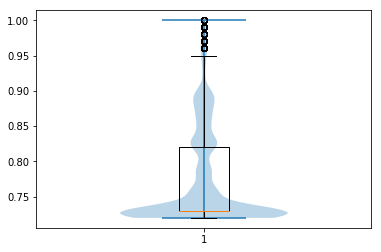

In [30]:
fig = plt.figure()
plt.boxplot(scores)
plt.violinplot(scores)
plt.show()

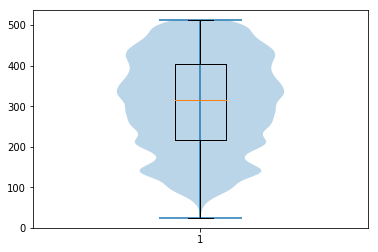

In [31]:
lengths_1 = []
for seq_1 in pro_1_seq:
        lengths_1.append(len(seq_1))
fig = plt.figure()
plt.boxplot(lengths_1)
plt.violinplot(lengths_1)
plt.show()

In [32]:
df_1 = pd.DataFrame(lengths_1)
df_1 .describe()

,0
count,26533.000000
mean,308.665850
std,114.990211
min,25.000000
25%,216.000000
50%,316.000000
75%,404.000000
max,512.000000


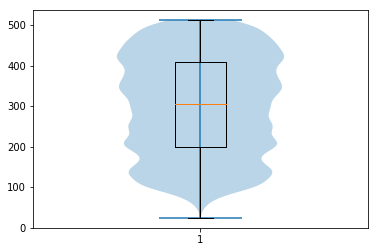

In [33]:
lengths_2 = []
for seq_2 in pro_2_seq:
        lengths_2.append(len(seq_2))
fig = plt.figure()
plt.boxplot(lengths_2)
plt.violinplot(lengths_2)
plt.show()

In [34]:
df_2 = pd.DataFrame(lengths_2)
df_2 .describe()

,0
count,26533.000000
mean,301.324012
std,122.092350
min,24.000000
25%,200.000000
50%,306.000000
75%,408.000000
max,512.000000
